In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import copy

In [2]:
subscribers = pd.read_pickle('subscribers')
engagement = pd.read_pickle('engagement')
csr = pd.read_pickle('customer_service_reps')

# Data cleaning

In [3]:
df = pd.read_csv('subscribers.csv')

In [4]:
engagement_gp = engagement.groupby(by='subid').mean()

In [5]:
m1 = pd.merge(df, engagement_gp, how='left', left_on='subid', right_index=True)

In [61]:
m1.isna().sum()

Unnamed: 0                              0
subid                                   0
package_type                        35574
num_weekly_services_utilized       110450
preferred_genre                     36326
intended_use                         3549
weekly_consumption_hour             37930
num_ideal_streaming_services       112170
age                                 35169
male_TF                               269
country                                 0
attribution_technical                   0
attribution_survey                   2644
op_sys                              13375
months_per_bill_period                  0
plan_type                               0
monthly_price                           0
discount_price                          0
account_creation_date                   0
trial_end_date                          0
initial_credit_card_declined            0
join_fee                            34904
language                                0
payment_type                      

Fill NaN with mean or mode

In [22]:
# m1.loc[(m1['age']>100)|(m1['age']< 5),'age'] = np.nan
# age_mean = int(m1.age.mean())
# m1.age.fillna(age_mean,inplace=True)

# m1.male_TF.fillna(m1.male_TF.mode()[0],inplace=True)

# m1.op_sys.fillna(m1.op_sys.mode()[0],inplace=True)

# m1.num_weekly_services_utilized.fillna(0,inplace=True)

# m1.preferred_genre.fillna(m1.preferred_genre.mode()[0],inplace=True)

# m1.loc[(m1['weekly_consumption_hour']<0),'weekly_consumption_hour'] = np.nan
# m1.weekly_consumption_hour.fillna(m1.weekly_consumption_hour.mean(),inplace=True)

# m1.intended_use.fillna(m1.intended_use.mode()[0],inplace=True)

# m1.loc[(m1['num_ideal_streaming_services']<0),'num_ideal_streaming_services'] = np.nan
# m1.num_ideal_streaming_services.fillna(m1.num_ideal_streaming_services.mean(),inplace=True)

# m1.package_type.fillna(m1.package_type.mode()[0],inplace=True)

35169
0


Drop NaN

In [6]:
m1.loc[(m1['age']>100)|(m1['age']< 5),'age'] = np.nan
m1.loc[(m1['weekly_consumption_hour']<0),'weekly_consumption_hour'] = np.nan
m1.loc[(m1['num_ideal_streaming_services']<0),'num_ideal_streaming_services'] = np.nan

In [7]:
df_1 = m1[['weekly_consumption_hour','age','male_TF',
           'payment_period_x','app_opens','num_videos_completed','num_series_started']]
df_1 = df_1.dropna(axis=0) 

In [ ]:
# df_1 = subs_df1[['num_weekly_services_utilized'
#                             ,'preferred_genre','intended_use'
#                             ,'weekly_consumption_hour','num_ideal_streaming_services'
#                            ,'age','male_TF','op_sys','payment_period_x','package_type']]

In [8]:
df_1 = pd.get_dummies(df_1,prefix=None,prefix_sep="_",dummy_na=False,drop_first=True)
df_1

,weekly_consumption_hour,age,payment_period_x,app_opens,num_videos_completed,num_series_started,male_TF_True
2,36.001186,25.0,0,1.000000,6.500000,0.500000,1
6,20.051667,61.0,1,0.975610,4.439024,0.951220,0
7,34.551230,23.0,1,2.260870,1.826087,0.630435,0
8,25.851492,73.0,1,1.500000,1.000000,0.000000,0
11,37.451142,24.0,1,2.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...
227619,30.201361,32.0,2,1.500000,6.000000,0.500000,0
227621,28.751405,61.0,1,1.000000,0.000000,0.000000,0
227622,24.401536,43.0,1,2.583333,3.916667,0.666667,0
227623,28.751405,38.0,1,1.777778,2.222222,0.222222,0


In [9]:
ss = StandardScaler()
df_1_scaled = pd.DataFrame(ss.fit_transform(df_1))
df_1_scaled

,0,1,2,3,4,5,6
0,1.670889,-1.522897,-0.954229,-0.485387,2.443257,0.163175,2.732392
1,-1.645236,1.120496,0.307116,-0.501922,1.180627,1.405163,-0.365980
2,1.369423,-1.669752,0.307116,0.369414,-0.420155,0.522198,-0.365980
3,-0.439372,2.001627,0.307116,-0.146414,-0.926246,-1.213082,-0.365980
4,1.972355,-1.596325,0.307116,0.192559,-0.926246,-1.213082,2.732392
...,...,...,...,...,...,...,...
110442,0.465025,-1.008904,1.568461,-0.146414,2.136939,0.163175,-0.365980
110443,0.163559,1.120496,0.307116,-0.485387,-1.538883,-1.213082,-0.365980
110444,-0.740838,-0.201200,0.307116,0.588027,0.860612,0.621927,-0.365980
110445,0.163559,-0.568338,0.307116,0.041904,-0.177467,-0.601412,-0.365980


# Clustering

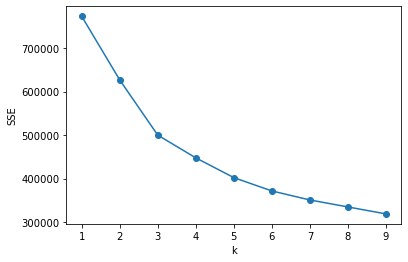

In [10]:
SSE = []
for k in range(1, 10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df_1_scaled)
    SSE.append(estimator.inertia_)
X = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [13]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters)
model.fit(df_1_scaled)
df_1['cluster'] =model.labels_
df_1['cluster'].value_counts()

3    37015
1    33311
2    27091
0    13030
Name: cluster, dtype: int64

In [14]:
centers = model.cluster_centers_
origin_centers = ss.inverse_transform(centers)
pd.DataFrame(origin_centers,columns=list(df_1.columns)[:-1])

,weekly_consumption_hour,age,payment_period_x,app_opens,num_videos_completed,num_series_started,male_TF_True
0,35.446729,46.938147,0.697030,1.665193,2.166567,0.437173,0.996393
1,26.268803,51.956022,0.300930,1.173450,1.318215,0.178682,0.000480
2,27.995015,36.660047,1.586405,1.343890,2.214611,0.305473,0.000295
3,26.833890,46.376972,0.579198,2.496243,3.928385,0.777552,0.001028


# Churn

In [8]:
import sys
import sklearn

import pandas as pd
import os
import operator
import numpy as np

import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter
# from sklearn.externals import joblib

import time 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

from catboost import CatBoostClassifier, Pool, cv
import catboost.utils
from catboost.utils import get_confusion_matrix

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [237]:
# m2 = pd.merge(m1, subscribers[['subid','retarget_TF']], how='inner', left_on='subid', right_on='subid')

In [9]:
df_2 = m1[['package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical','op_sys','plan_type','app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started',
        'current_sub_TF','trial_completed']]

In [10]:
df_2 = df_2.dropna(how='any')

In [18]:
df_2

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,plan_type,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,current_sub_TF,trial_completed
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS,base_uae_14_day_trial,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,False,True
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,Android,base_uae_14_day_trial,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,True,True
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,iOS,base_uae_14_day_trial,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,True,True
12,base,2.0,regional,supplement OTT,28.751405,2.0,57.0,False,brand sem intent google,iOS,base_uae_14_day_trial,2.400000,0.800000,3.600000,4.400000,0.000000,0.600000,False,True
13,economy,3.0,comedy,replace OTT,33.101274,2.0,54.0,False,facebook,iOS,base_uae_14_day_trial,5.071429,0.428571,3.714286,4.857143,0.000000,0.857143,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,base,4.0,drama,access to exclusive content,27.301448,2.0,44.0,False,email,iOS,base_uae_14_day_trial,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,True,True
227619,base,3.0,comedy,access to exclusive content,30.201361,2.0,32.0,False,email,Android,base_uae_14_day_trial,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,True,True
227622,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,email,iOS,base_uae_14_day_trial,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,True,True
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,iOS,base_uae_14_day_trial,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,True,True


In [11]:
df_2['Churn'] = 0
df_2.loc[(df_2.current_sub_TF==False)|(df_2.trial_completed==False),'Churn'] = 1

In [26]:
df_2.Churn.value_counts()

0    39395
1    21316
Name: Churn, dtype: int64

In [12]:
df_2.groupby(by='intended_use').mean()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,current_sub_TF,trial_completed,Churn
intended_use,,,,,,,,,,,,,
access to exclusive content,3.059713,28.180865,2.069497,46.532400,2.035481,0.589683,2.910718,4.807482,0.019693,0.609185,0.802303,0.943247,0.200549
education,2.913043,26.292783,2.000000,57.521739,1.773132,0.546199,2.815841,4.902103,0.074500,0.610894,0.434783,0.869565,0.565217
expand international access,2.886792,26.453361,2.018868,55.018868,1.668923,0.561254,2.628172,4.555409,0.038041,0.624135,0.528302,0.867925,0.471698
expand regional access,3.154930,27.587355,2.070423,54.464789,2.058841,0.562771,2.404386,4.639741,0.032221,0.563345,0.549296,0.901408,0.464789
other,2.971721,27.212373,2.064359,51.617260,2.136039,0.651568,2.874107,4.776698,0.040356,0.628018,0.537786,0.869332,0.469039
replace OTT,2.966299,28.074565,2.050689,43.766526,2.079834,0.593943,2.878632,4.787317,0.015717,0.601376,0.419113,0.828289,0.587802
supplement OTT,2.965348,27.959300,2.055933,44.641671,1.981809,0.563833,2.812943,4.754160,0.021351,0.599724,0.792089,0.941838,0.210696


In [14]:
df_2.columns

Index(['package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'op_sys', 'plan_type', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'current_sub_TF', 'trial_completed', 'Churn'],
      dtype='object')

In [359]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135002 entries, 2 to 227624
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   package_type                     135002 non-null  object 
 1   num_weekly_services_utilized     135002 non-null  float64
 2   preferred_genre                  135002 non-null  object 
 3   intended_use                     135002 non-null  object 
 4   weekly_consumption_hour          135002 non-null  float64
 5   num_ideal_streaming_services     135002 non-null  float64
 6   age                              135002 non-null  float64
 7   male_TF                          135002 non-null  float64
 8   attribution_technical            135002 non-null  object 
 9   op_sys                           135002 non-null  object 
 10  plan_type                        135002 non-null  object 
 11  app_opens                        135002 non-null  float64
 12  cu

In [13]:
df2_train, df2_test = train_test_split(df_2, test_size=0.3, random_state=42, 
                                       shuffle=True, stratify=df_2['Churn'])

In [14]:
df2_train_y = df2_train.Churn.astype('int')
df2_train_x = df2_train.drop(columns=['current_sub_TF','trial_completed','Churn'],axis=1)
df2_test_y = df2_test.Churn.astype('int')
df2_test_x = df2_test.drop(columns=['current_sub_TF','trial_completed','Churn'],axis=1)

Catboost Model

In [17]:
model_CB = CatBoostClassifier(
#     iterations=100,
#     learning_rate = 0.01,
#     depth=10,
    random_seed=32, 
#     od_type = "Iter",
#     od_wait = 100,
 #   eval_metric="Logloss",
    eval_metric = 'AUC',
    cat_features=[0,2,3,8,9,10],
#     auto_class_weights=auto_class_weights,
#     verbose=False,
    verbose=True,        
)

In [18]:
grid = {
    'iterations': randint(200,500),
    'learning_rate': uniform(0.01, 0.1),
    'depth': randint(4,10),
}

In [19]:
rscv = RandomizedSearchCV (estimator = model_CB, param_distributions = grid, cv = 5)

In [20]:
rscv.fit(df2_train_x,df2_train_y)

0:	total: 221ms	remaining: 49.7s
1:	total: 280ms	remaining: 31.4s
2:	total: 385ms	remaining: 28.6s
3:	total: 456ms	remaining: 25.3s
4:	total: 523ms	remaining: 23.1s
5:	total: 601ms	remaining: 22s
6:	total: 689ms	remaining: 21.6s
7:	total: 758ms	remaining: 20.7s
8:	total: 815ms	remaining: 19.6s
9:	total: 871ms	remaining: 18.8s
10:	total: 960ms	remaining: 18.8s
11:	total: 1.02s	remaining: 18.2s
12:	total: 1.08s	remaining: 17.7s
13:	total: 1.16s	remaining: 17.5s
14:	total: 1.23s	remaining: 17.3s
15:	total: 1.28s	remaining: 16.8s
16:	total: 1.34s	remaining: 16.5s
17:	total: 1.4s	remaining: 16.1s
18:	total: 1.45s	remaining: 15.8s
19:	total: 1.53s	remaining: 15.8s
20:	total: 1.59s	remaining: 15.5s
21:	total: 1.65s	remaining: 15.3s
22:	total: 1.7s	remaining: 15s
23:	total: 1.77s	remaining: 14.9s
24:	total: 1.83s	remaining: 14.7s
25:	total: 1.89s	remaining: 14.5s
26:	total: 1.95s	remaining: 14.3s
27:	total: 2.01s	remaining: 14.2s
28:	total: 2.07s	remaining: 14.1s
29:	total: 2.12s	remaining: 13

17:	total: 1.16s	remaining: 13.4s


KeyboardInterrupt: 

In [370]:
best_params_CB=rscv.best_params_
print(rscv.best_params_)

{'depth': 7, 'iterations': 293, 'learning_rate': 0.04427485433280019}


In [15]:
best_params_CB = {'depth': 7, 'iterations': 293, 'learning_rate': 0.04427485433280019}

In [371]:
rscv.best_score_

0.8253245988776385

In [16]:
model_CB_best = CatBoostClassifier(
    random_seed=32, 
    eval_metric = 'AUC',
    cat_features=[0,2,3,8,9,10],
    verbose=True,    
    **best_params_CB
)

In [17]:
model_CB_best.fit(df2_train_x,df2_train_y,eval_set=(df2_test_x, df2_test_y),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8674135	best: 0.8674135 (0)	total: 285ms	remaining: 1m 23s
1:	test: 0.8678976	best: 0.8678976 (1)	total: 346ms	remaining: 50.3s
2:	test: 0.8698567	best: 0.8698567 (2)	total: 413ms	remaining: 39.9s
3:	test: 0.8729641	best: 0.8729641 (3)	total: 471ms	remaining: 34.1s
4:	test: 0.8732521	best: 0.8732521 (4)	total: 534ms	remaining: 30.8s
5:	test: 0.8731390	best: 0.8732521 (4)	total: 592ms	remaining: 28.3s
6:	test: 0.8737445	best: 0.8737445 (6)	total: 664ms	remaining: 27.1s
7:	test: 0.8745433	best: 0.8745433 (7)	total: 723ms	remaining: 25.7s
8:	test: 0.8749584	best: 0.8749584 (8)	total: 796ms	remaining: 25.1s
9:	test: 0.8749552	best: 0.8749584 (8)	total: 851ms	remaining: 24.1s
10:	test: 0.8748858	best: 0.8749584 (8)	total: 936ms	remaining: 24s
11:	test: 0.8756724	best: 0.8756724 (11)	total: 1.02s	remaining: 23.8s
12:	test: 0.8764506	best: 0.8764506 (12)	total: 1.1s	remaining: 23.7s
13:	test: 0.8765276	best: 0.8765276 (13)	total: 1.2s	remaining: 23.9s
14:	test: 0.8773131	best: 0.87

117:	test: 0.8913015	best: 0.8913164 (114)	total: 8.07s	remaining: 12s
118:	test: 0.8912949	best: 0.8913164 (114)	total: 8.14s	remaining: 11.9s
119:	test: 0.8913193	best: 0.8913193 (119)	total: 8.21s	remaining: 11.8s
120:	test: 0.8913117	best: 0.8913193 (119)	total: 8.27s	remaining: 11.8s
121:	test: 0.8913503	best: 0.8913503 (121)	total: 8.35s	remaining: 11.7s
122:	test: 0.8913808	best: 0.8913808 (122)	total: 8.37s	remaining: 11.6s
123:	test: 0.8913822	best: 0.8913822 (123)	total: 8.4s	remaining: 11.5s
124:	test: 0.8913699	best: 0.8913822 (123)	total: 8.47s	remaining: 11.4s
125:	test: 0.8914053	best: 0.8914053 (125)	total: 8.52s	remaining: 11.3s
126:	test: 0.8914102	best: 0.8914102 (126)	total: 8.57s	remaining: 11.2s
127:	test: 0.8914313	best: 0.8914313 (127)	total: 8.64s	remaining: 11.1s
128:	test: 0.8914367	best: 0.8914367 (128)	total: 8.72s	remaining: 11.1s
129:	test: 0.8914204	best: 0.8914367 (128)	total: 8.78s	remaining: 11s
130:	test: 0.8914393	best: 0.8914393 (130)	total: 8.85s	

231:	test: 0.8923131	best: 0.8923233 (229)	total: 16.1s	remaining: 4.24s
232:	test: 0.8923164	best: 0.8923233 (229)	total: 16.2s	remaining: 4.17s
233:	test: 0.8923268	best: 0.8923268 (233)	total: 16.2s	remaining: 4.1s
234:	test: 0.8923256	best: 0.8923268 (233)	total: 16.3s	remaining: 4.03s
235:	test: 0.8923223	best: 0.8923268 (233)	total: 16.4s	remaining: 3.96s
236:	test: 0.8923243	best: 0.8923268 (233)	total: 16.5s	remaining: 3.89s
237:	test: 0.8923385	best: 0.8923385 (237)	total: 16.6s	remaining: 3.83s
238:	test: 0.8923588	best: 0.8923588 (238)	total: 16.6s	remaining: 3.76s
239:	test: 0.8923539	best: 0.8923588 (238)	total: 16.7s	remaining: 3.7s
240:	test: 0.8923699	best: 0.8923699 (240)	total: 16.8s	remaining: 3.63s
241:	test: 0.8923663	best: 0.8923699 (240)	total: 16.9s	remaining: 3.56s
242:	test: 0.8923798	best: 0.8923798 (242)	total: 17s	remaining: 3.49s
243:	test: 0.8924078	best: 0.8924078 (243)	total: 17s	remaining: 3.42s
244:	test: 0.8924035	best: 0.8924078 (243)	total: 17.1s	r

<BarContainer object of 17 artists>

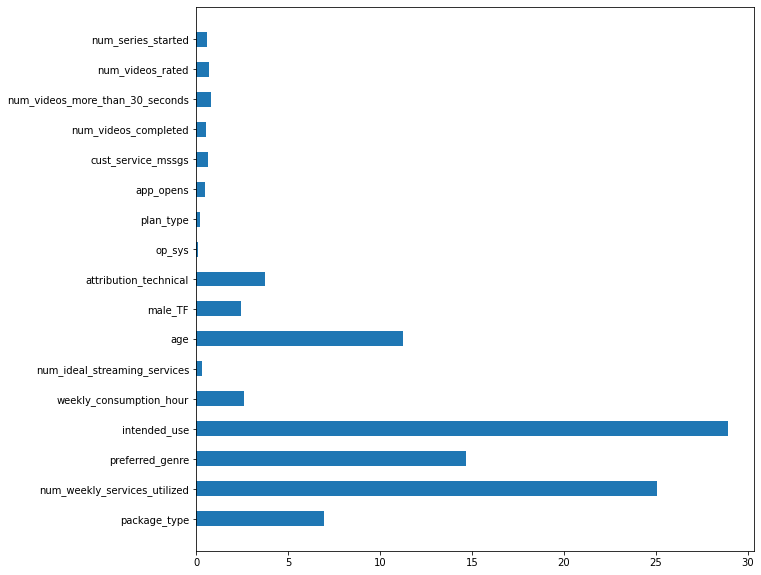

In [24]:
fea_ = model_CB_best.feature_importances_
fea_name = model_CB_best.feature_names_
plt.figure(figsize=(10, 10))
plt.barh(fea_name,fea_,height =0.5)

In [18]:
df2_test['prob_churn_cb'] = model_CB_best.predict_proba(df2_test_x)[:,1]

<ipython-input-18-88fbf631e8ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_test['prob_churn_cb'] = model_CB_best.predict_proba(df2_test_x)[:,1]


Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [20]:
df2_lgst = df_2.drop(columns=['current_sub_TF','trial_completed'],axis=1)
df2_lgst = pd.get_dummies(df2_lgst,prefix=None,prefix_sep="_",dummy_na=False,drop_first=True)

In [21]:
df2_train_x_linear, df2_test_x_linear = train_test_split(df2_lgst, test_size=0.3, random_state=42, 
                                       shuffle=True, stratify=df_2['Churn'])

In [22]:
df2_train_x_linear.drop(columns='Churn',axis=1,inplace=True)
df2_test_x_linear.drop(columns='Churn',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df2_train_x_linear

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,...,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
17326,2.0,25.851492,2.0,33.0,2.045455,0.204545,1.090909,3.045455,0.000000,0.545455,...,0,0,0,0,1,1,0,0,0,0
75808,3.0,22.951579,2.0,69.0,1.986842,0.144737,3.763158,4.539474,0.039474,0.986842,...,0,0,0,0,1,1,0,0,0,0
3683,3.0,28.751405,2.0,56.0,1.545455,0.181818,0.363636,3.545455,0.000000,0.181818,...,0,0,0,0,1,1,0,0,0,0
160943,3.0,30.201361,2.0,47.0,2.800000,0.500000,4.100000,5.000000,0.000000,0.900000,...,0,0,0,0,1,1,0,0,0,0
180784,3.0,25.851492,2.0,56.0,1.285714,0.285714,0.428571,3.714286,0.000000,0.142857,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150227,3.0,33.101274,2.0,26.0,3.272727,1.363636,3.181818,4.636364,0.000000,0.636364,...,1,0,0,0,1,1,0,0,0,0
70659,3.0,33.101274,2.0,50.0,2.071429,0.428571,3.428571,4.857143,0.000000,0.785714,...,1,0,0,0,1,1,0,0,0,0
77277,2.0,17.151754,2.0,21.0,1.000000,0.666667,2.000000,5.666667,0.000000,0.333333,...,0,0,0,0,0,1,0,0,0,0
89089,3.0,22.951579,2.0,31.0,3.000000,1.000000,3.500000,6.500000,0.000000,0.500000,...,0,0,0,0,1,1,0,0,0,0


In [24]:
lgstModel = LogisticRegression()
lgstModel.fit(df2_train_x_linear,df2_train_y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
df2_test['prob_churn_logit'] = lgstModel.predict_proba(df2_test_x_linear)[:,1]

<ipython-input-25-b5200d3d0962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_test['prob_churn_logit'] = lgstModel.predict_proba(df2_test_x_linear)[:,1]


AUC

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')

In [30]:
def roc_draw(y_test, pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

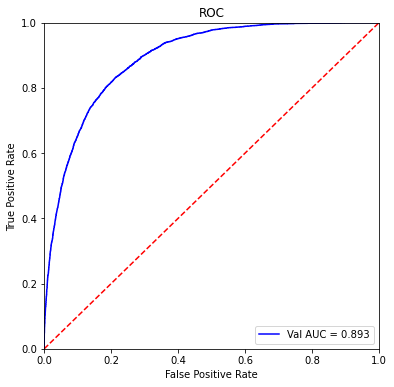

In [33]:
pre_cb = model_CB_best.predict_proba(df2_test_x)[:,1]
roc_draw(df2_test_y,pre_cb)

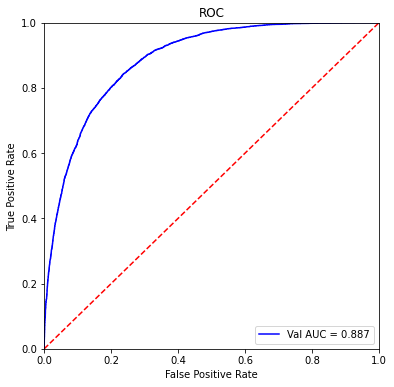

In [61]:
pre_lgst = lgstModel.predict_proba(df2_test_x_linear)[:,1]
roc_draw(df2_test_y,pre_lgst)

SHAP

In [73]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [74]:
import shap

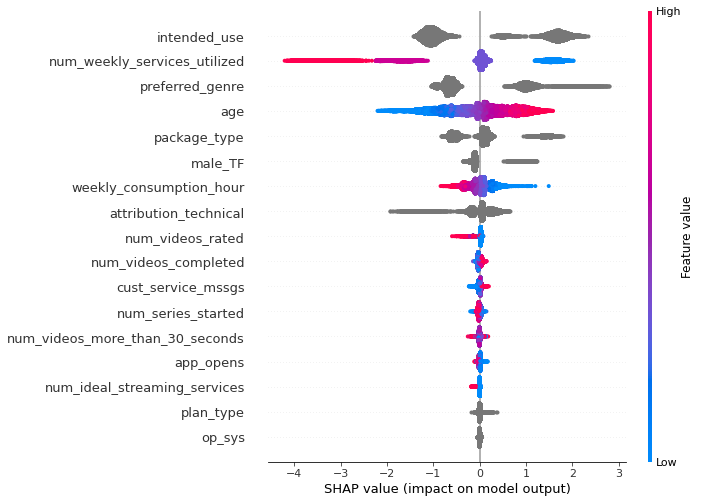

In [79]:
explainer_CB = shap.Explainer(model_CB_best)
shap_values_CB = explainer_CB(df2_train_x)
shap.summary_plot(shap_values_CB, df2_train_x)

In [30]:
df2_test['random_draws'] = np.random.random(df2_test.shape[0])

<ipython-input-30-2ea595508de7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_test['random_draws'] = np.random.random(df2_test.shape[0])


In [27]:
df2_test

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,...,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,current_sub_TF,trial_completed,Churn,prob_churn_cb,random_draws
198748,base,3.0,comedy,access to exclusive content,30.201361,2.0,29.0,True,facebook,iOS,...,0.500000,4.375000,4.875000,0.000000,1.000000,True,True,0,0.059887,0.594483
220967,base,3.0,other,access to exclusive content,21.501623,2.0,30.0,False,facebook,Android,...,0.900000,3.400000,5.000000,0.000000,0.200000,False,True,1,0.551019,0.921519
111569,enhanced,4.0,comedy,access to exclusive content,34.551230,2.0,43.0,False,facebook,Android,...,1.000000,3.500000,6.500000,0.000000,0.500000,True,True,0,0.000790,0.827193
49819,base,3.0,drama,access to exclusive content,30.201361,2.0,62.0,False,internal,iOS,...,0.217391,1.913043,5.195652,0.065217,0.760870,True,True,0,0.356242,0.481129
137838,base,3.0,comedy,replace OTT,30.201361,2.0,48.0,False,other,iOS,...,0.375000,3.125000,5.125000,0.000000,0.750000,False,True,1,0.422217,0.957244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167999,base,4.0,comedy,access to exclusive content,34.551230,2.0,68.0,True,google_organic,iOS,...,0.152174,3.173913,4.478261,0.021739,0.978261,True,True,0,0.047710,0.073839
185539,base,2.0,comedy,access to exclusive content,20.051667,2.0,58.0,False,email,Android,...,0.583333,3.750000,5.666667,0.000000,0.666667,False,True,1,0.554591,0.884463
247,enhanced,3.0,regional,replace OTT,33.101274,2.0,31.0,True,organic,iOS,...,0.571429,2.571429,4.571429,0.000000,0.285714,False,True,1,0.755257,0.865020
198305,enhanced,2.0,comedy,access to exclusive content,22.951579,2.0,26.0,False,email,iOS,...,0.307692,1.384615,3.461538,0.000000,0.384615,True,True,0,0.043898,0.996279


In [28]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['Churn'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['Churn'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['Churn'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_cb'] = (df_f['prob_churn_cb'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_cb'] = (df_f['make_offer_cb'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_cb_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_cb'], 'price_cb_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [38]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 0.8
acceptance_rate_churn = 0.2
threshold = 0.45
base_price = 4.73
discount_amount = 0.2
cases = ['no_offer', 'cb_offer','logit_offer']

# base assessment
df2_test, df_impact = apply_offers(df2_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df2_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount = t_acceptance_rate_churn
    _, t_df_impact = apply_offers(df2_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df2_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [393]:
df2_test

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,...,trial_completed,Churn,prob_churn_cb,random_draws,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_cb,accept_offer_cb,price_cb_offer
36373,base,2.0,comedy,access to exclusive content,27.301448,2.000000,62.0,0.0,brand sem intent bing,iOS,...,1.0,0,0.451636,0.501781,10,1.0,True,False,False,10.0
5295,base,3.0,comedy,replace OTT,28.751405,2.000000,37.0,0.0,email,iOS,...,1.0,0,0.398142,0.111395,10,1.0,True,False,False,10.0
181779,base,3.0,regional,access to exclusive content,31.651317,2.000000,29.0,1.0,facebook,Android,...,1.0,0,0.329068,0.843129,10,1.0,True,False,False,10.0
16713,base,0.0,comedy,access to exclusive content,46.000000,2.061287,46.0,0.0,facebook,iOS,...,1.0,0,0.059688,0.923643,10,1.0,True,False,False,10.0
215432,base,2.0,comedy,expand international access,25.851492,2.000000,44.0,0.0,facebook,iOS,...,1.0,1,0.989524,0.259979,0,0.7,True,True,True,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118859,base,3.0,comedy,expand international access,30.201361,2.000000,48.0,0.0,facebook,iOS,...,1.0,1,0.933640,0.702015,0,0.7,False,True,False,0.0
218067,base,0.0,comedy,replace OTT,46.000000,2.061287,46.0,0.0,brand sem intent google,iOS,...,1.0,1,0.628415,0.340666,0,0.7,True,True,True,3.0
190442,economy,3.0,regional,access to exclusive content,30.201361,2.000000,60.0,0.0,facebook,iOS,...,1.0,0,0.688173,0.679411,10,1.0,True,True,True,3.0
152750,base,3.0,drama,replace OTT,28.751405,2.000000,57.0,0.0,search,Android,...,1.0,0,0.848852,0.458300,10,1.0,True,True,True,3.0


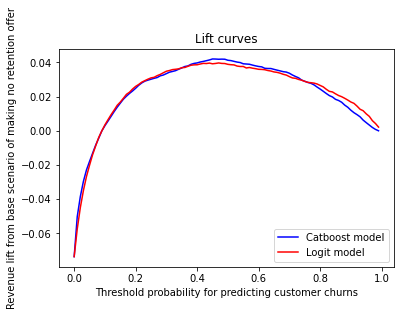

In [42]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['cb_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Catboost model', 'Logit model'])

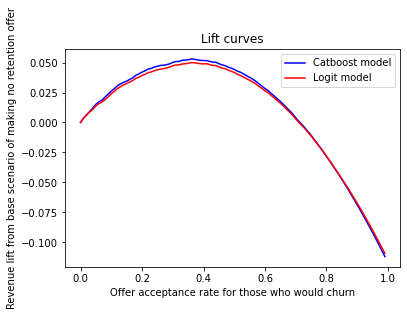

In [43]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['cb_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Catboost model', 'Logit model'])

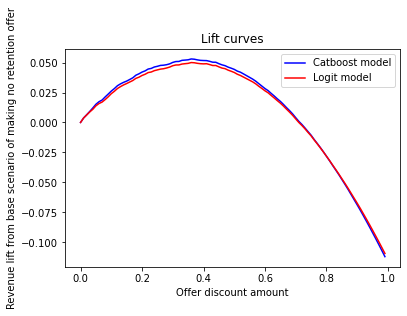

In [44]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['cb_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Catboost model', 'Logit model'])